In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_bank = pd.read_csv('bank-additional-full.csv',sep=";")
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Problem Statement

The following dataset shows a Portugal bank's marketing campaigns results in an attempt to evaluate the success of the bank's telemarketing. Conducted campaigns seem to be based mostly on direct phone calls, offering bank clients to place a term deposit. Term deposits allow banks to hold onto a deposit for a specific amount of time, letting banks invest in higher gain financial products in order to make a profit. Additionally, banks also hold a better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. The bank found a possible revenue decline problem upon investigation, where the root cause is that their clients are not depositing as frequently as before. Hence, the Portuguese bank would like to identify existing clients that have a higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

A machine learning (ML) algorithm based on the following data can be utilized to help banks predict potential clients who are likely to place a deposit upon receiving the telemarketing campaign. Not only will this help the banks to have a more effective marketing effort by prioritizing target customers, but also aid in allocating funds and manpower appropriately to further minimize marketing costs. This may also give an insight to banks how effective direct phone call campaigns are, as compared to other sales channels; and vice versa.

This dataset will involve a supervised learning approach to a classification problem. We will look at accuracy, precision, recall, and f1-score to evaluate the goodness of the model, focusing on the recall portion as our end goal is to minimize the cost the bank spent on marketing.

The risks involved may include overestimation of target customer behavior despite having achieved all necessary aspects to be classified as 'a likely client', and vice versa

# Data Understanding

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Quick insight(s) from above:

- **age**: The bank's target age of client seems to be 32 and 47 (IQR). Its distribution also seems to be the most 'normal'. Hence, may be key for our machine learning algorithm.
- **duration**: The mean for duration is 258.28, which drastically differs from the median (180). This can be due to the fact that there are some high duration calls as outliers that skew the distribution to the right.
- **campaign**: Clients are minimum contacted two times (median = 2) during the campaign.
- **previous**: Most of the values are 0, which is similar to the values of 'pdays' attribute - '999' means there was no previous contact with the client. This shows that most of the clients have not been contacted before.
- **emp.var.rate**: Values tend to be between -1.8 and 1.4.
- **cons.price.idx** and **cons.conf.idx** do not have much variation.
- **euribor3m**: The clients seem to be contacted once the Euribor3 rate reaches between 1.3 and 4.96.

In terms of social and economic context attributes: 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed' do not show any striking/apparent distribution, so they may not be significant indicator in the model. They are also attributes which are not necessarily determined by the bank. However, they will be kept until further analysis.

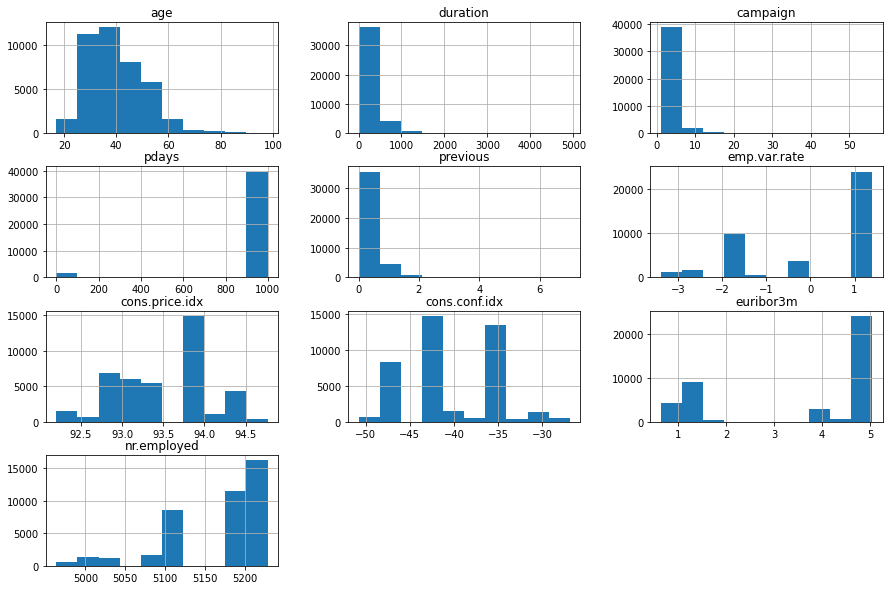

In [ ]:
df_bank.hist(figsize=(15,10));

# EDA

In [ ]:
# Check null value
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There does not seem to be any null values present.

In [ ]:
# duplicate check and dropping any duplicates

df_bank[df_bank.duplicated()].head()
df_bank.drop_duplicates(keep='first',inplace=True)

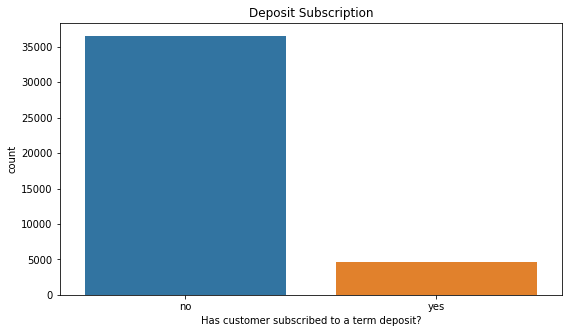

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(data=df_bank, x = 'y')
plt.xlabel('Has customer subscribed to a term deposit?')
plt.title('Deposit Subscription');

There is a high chance of data imbalance, seeing as the number of 'no' is almost ~8x more than the 'yes' data. There is a risk of the data prediction to be skewed due to insufficient 'yes' data.

### a. age

Age Categories:

17-29 = Young

30-43 = Middle-age Adult

44-56 = Old-age Adult

56-100 = Elderly

In [ ]:
age= [17,30,43,56,100]
labels = ['Young','Middle-age Adult','Old-age Adult','Elderly']
df_bank['agegroup'] = pd.cut(df_bank['age'], bins=age, labels=labels, right=False)
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle-age Adult
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle-age Adult
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Elderly
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Old-age Adult
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Elderly
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Old-age Adult


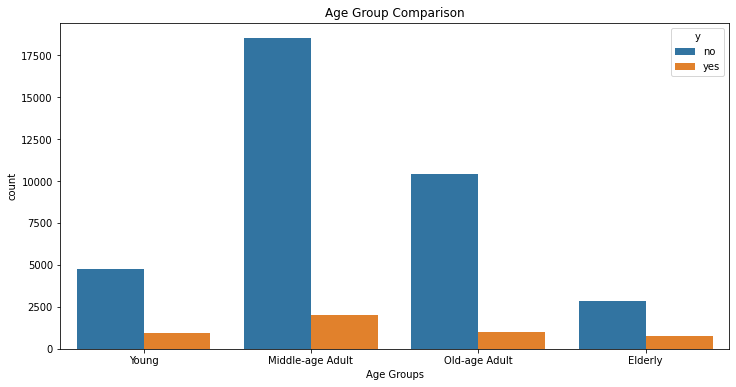

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["agegroup"],hue=df_bank["y"], data=df_bank)
plt.title('Age Group Comparison')
plt.xlabel('Age Groups')
plt.show()

In [ ]:
age = ((pd.crosstab(index= df_bank["agegroup"], columns= df_bank["y"], normalize="index"))*100).round(2)
age.sort_values('yes', ascending=False)

y,no,yes
agegroup,,
Elderly,79.31,20.69
Young,83.73,16.27
Middle-age Adult,90.24,9.76
Old-age Adult,91.48,8.52


From the table above, we can see that clients who are 'Elderly' or 'Young' have a higher chance of making a term deposit, with a success rate of about ~16-20%. Those who are 'Middle-aged' or 'Old-aged' have a lower chance of less than ~10% to make a term deposit with the bank.

### b. job

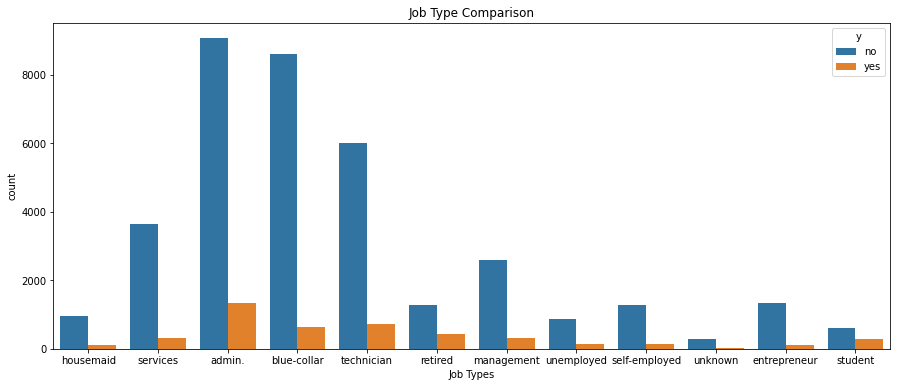

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df_bank["job"],hue=df_bank["y"], data=df_bank)
plt.title('Job Type Comparison')
plt.xlabel('Job Types')
plt.show()

In [ ]:
job = (pd.crosstab(index=df_bank["job"], columns= df_bank["y"], normalize= "index") *100).round(2)
job.sort_values('yes', ascending=False)


y,no,yes
job,,
student,68.57,31.43
retired,74.74,25.26
unemployed,85.80,14.20
admin.,87.03,12.97
management,88.78,11.22
unknown,88.79,11.21
technician,89.17,10.83
self-employed,89.51,10.49
housemaid,90.00,10.00


Clients who are 'student' or 'retired' are more likely to make a term deposit, with rates of 31.43% and 25.23% respectively. On the other hand, the least likely to make a term deposit are 'blue-collared' clients with a rate of 6.89%. 

We assume that clients who are classified in 'unknown' are uncomfortable in mentioning their personal information. They are, however, still considered as potential clients as they may be clients who have never been offered any campaign before.


# C. marital

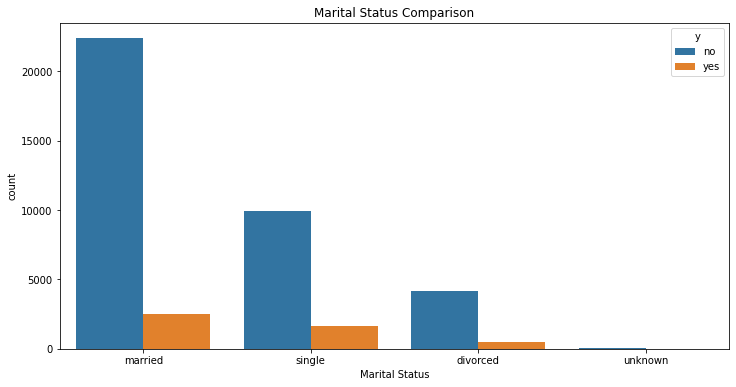

In [ ]:
splt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["marital"],hue=df_bank["y"], data=df_bank)
plt.title('Marital Status Comparison')
plt.xlabel('Marital Status')
plt.show()

In [ ]:
marital = (pd.crosstab(index=df_bank["marital"], columns= df_bank["y"], normalize= "index") *100).round(2)
marital.sort_values('yes', ascending=False)

y,no,yes
marital,,
unknown,85.00,15.00
single,85.99,14.01
divorced,89.68,10.32
married,89.84,10.16


The graph shows that 'married' clients have a slightly higher tendency to make a term deposit, as compared to 'single' or 'divorced' clients. We assume that clients who are classified in 'unknown' are uncomfortable in mentioning their personal information. They are, however, still considered as potential clients as they may be clients who have never been offered any campaign before.

### d. Education

We decide to combine the three categories 'basic.4y', 'basic.6y', 'basic.9y' into one group called 'Basic' for easier interpretation of data. 

In [ ]:
basic_grps = ['basic.4y', 'basic.6y', 'basic.9y']

df_bank['education'] = np.where(df_bank['education'].isin(basic_grps), 'Basic', df_bank['education'])

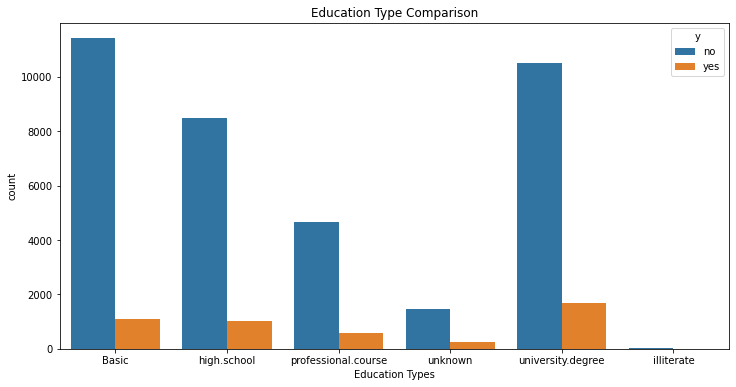

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["education"],hue=df_bank["y"], data=df_bank)
plt.title('Education Type Comparison')
plt.xlabel('Education Types')
plt.show()

In [ ]:
education = (pd.crosstab(index=df_bank["education"], columns= df_bank["y"], normalize= "index") *100).round(2)
education.sort_values('yes', ascending=False)

y,no,yes
education,,
illiterate,77.78,22.22
unknown,85.49,14.51
university.degree,86.28,13.72
professional.course,88.65,11.35
high.school,89.16,10.84
Basic,91.30,8.70


Clients who are 'illiterate' seem to have the highest convertion rate of about ~22%, followed by those whose education background are unknown (14.51%). In terms of practicality in a scenario, despite having a potentially high rate of success, they may not be an effective audience for the bank to target for markerting the term deposit campaign. However, they are still kept in mind as potential audience, as mentioned with clients in 'unknown' categories. 

It is more likely, perhaps towards clients with 'university degree' or 'professional course', who seem to have a relatively high convertion rate of 13.72% and 11.35% respectively, of making a term deposit with the bank as well. Clients with 'Basic' education have the least tendency to make a term deposit (8.70%).

### e. default

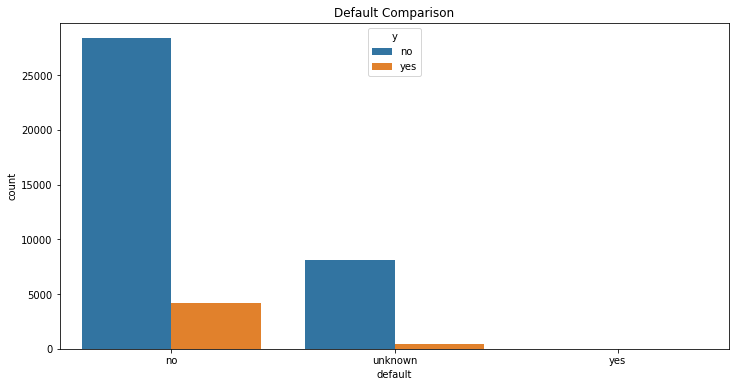

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["default"],hue=df_bank["y"], data=df_bank)
plt.title('Default Comparison')
plt.show()

In [ ]:
df_bank['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

The value counts is done in order to determine the actual value of 'yes'.
It turns out that the 'yes' section of 'default' attribute has only 3 sets of data, which is very small compared to the 'no' section that has over 30000 data, followed by 'unknown' with ~8500 data. 

In [ ]:
default = (pd.crosstab(index=df_bank["default"], columns= df_bank["y"], normalize= "index") *100).round(2)
default.sort_values('yes', ascending=False)

y,no,yes
default,,
no,87.12,12.88
unknown,94.85,5.15
yes,100.00,0.00


The 'default' column shows whether the client has credit in their bank account or not. 

Upon adding the data and reassessing the graph, we can see that there is a higher chance for clients to make a term deposit if they do not have credit in their bank accounts, with a convertion rate of ~13%. This will be a good indicator for the bank's future target audience. Moreover, there is a 100% chance of clients rejecting the marketing campaign if they have credit in their bank accounts. This will perhaps be more compelling if the amount of data is not too low.

### f. housing

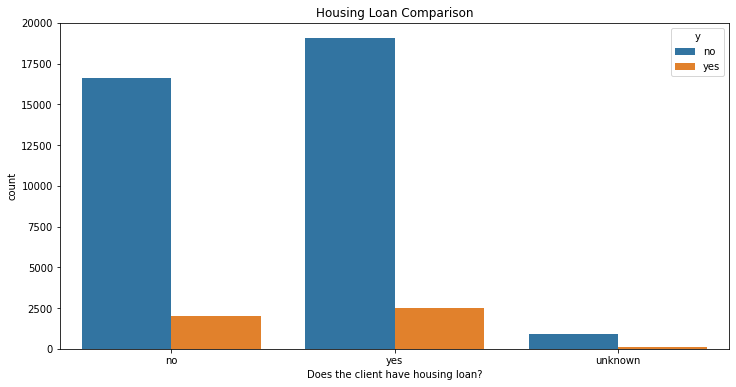

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["housing"],hue=df_bank["y"], data=df_bank)
plt.title('Housing Loan Comparison')
plt.xlabel('Does the client have housing loan?')
plt.show()

In [ ]:
housing_loan = (pd.crosstab(index=df_bank["housing"], columns= df_bank["y"], normalize= "index") *100).round(2)
housing_loan.sort_values('yes', ascending=False)

y,no,yes
housing,,
yes,88.38,11.62
no,89.12,10.88
unknown,89.19,10.81


There is a slightly higher chance for clients that have a housing loan to make a term deposit, with quite a similar conversion rate for those clients who do not have a housing loan and 'unknown' data.

### g. loan

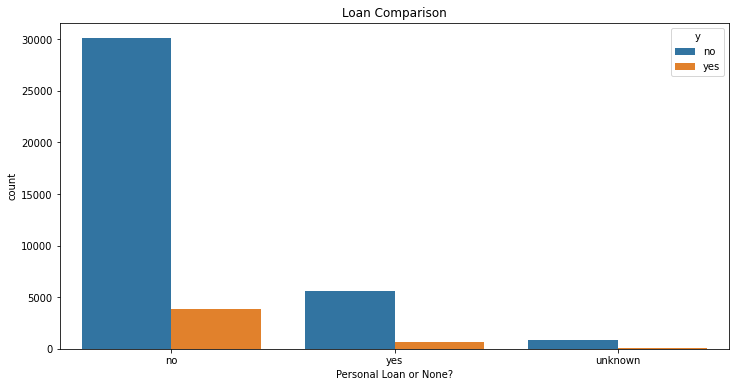

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["loan"],hue=df_bank["y"], data=df_bank)
plt.title('Loan Comparison')
plt.xlabel('Personal Loan or None?')
plt.show()

In [ ]:
loan = (pd.crosstab(index=df_bank["loan"], columns= df_bank["y"], normalize= "index") *100).round(2)
loan.sort_values('yes', ascending=False)

y,no,yes
loan,,
no,88.66,11.34
yes,89.07,10.93
unknown,89.19,10.81


Clients who do not have a personal loan in their bank account has a slightly higher chance of about ~1.4%, in making a term deposit, compared to those who have a personal loan. 'Unknown' clients have a similar rate to those with personal loan.

### h. contact

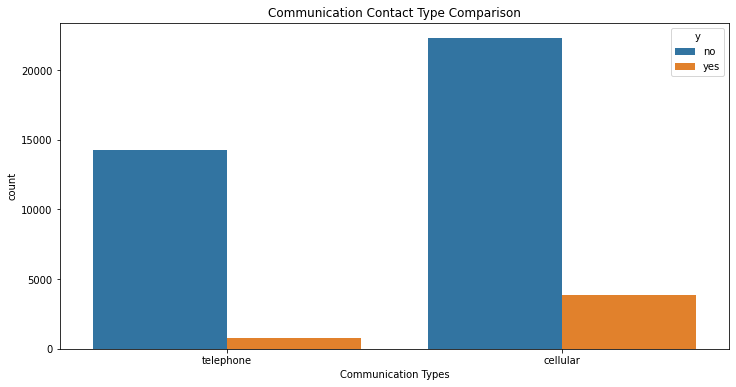

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["contact"],hue=df_bank["y"], data=df_bank)
plt.title('Communication Contact Type Comparison')
plt.xlabel('Communication Types')
plt.show()

In [ ]:
contact_type = (pd.crosstab(index=df_bank["contact"], columns= df_bank["y"], normalize= "index") *100).round(2)
contact_type.sort_values('yes', ascending=False)

y,no,yes
contact,,
cellular,85.26,14.74
telephone,94.77,5.23


This is a good indicator for the dependent target variable. According to the data, it shows that there are more clients who decided to take a term deposit upon receiving contact through cellular means (14.74%), as compared to telephone (5.23%), from the marketing team. 
Knowing this, we can help the bank further segregate their target audience better and determine the best way to communicate with the clients to improve convertion rate. 

### i. month

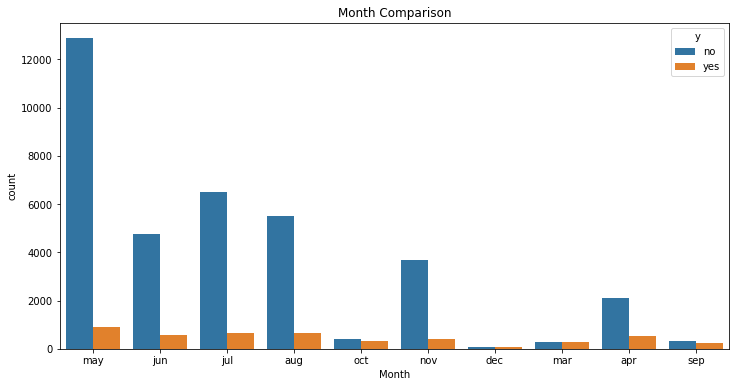

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["month"],hue=df_bank["y"], data=df_bank)
plt.title('Month Comparison')
plt.xlabel('Month')
plt.show()

In [ ]:
month = (pd.crosstab(index=df_bank["month"], columns= df_bank["y"], normalize= "index") *100).round(2)
month.sort_values(by='month', ascending=False)

y,no,yes
month,,
sep,55.09,44.91
oct,56.07,43.93
nov,89.85,10.15
may,93.56,6.44
mar,49.45,50.55
jun,89.49,10.51
jul,90.96,9.04
dec,51.10,48.90
aug,89.39,10.61


<BarContainer object of 41176 artists>

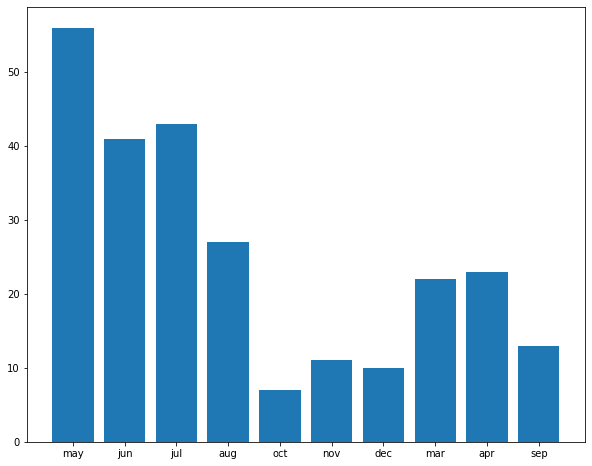

In [ ]:
# Month vs Campaign relationship 

plt.figure(figsize=(10, 8))
plt.bar(df_bank['month'], df_bank['campaign'])

From above:

- Most of the clients seemed to be contacted around May-July (summer) period.
- September until December are quite similar in campaigns carried out, and January-February do not seem to have any observations.
- March and April then show signs of increase in campaigns again, possibly to reach May-July frequencies.
- Clients seem to more likely make a term deposit in September, October and December. 

### j. day_of_week

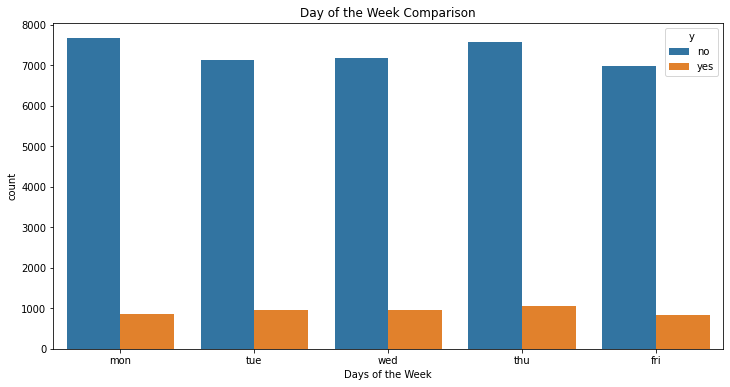

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["day_of_week"],hue=df_bank["y"], data=df_bank)
plt.title('Day of the Week Comparison')
plt.xlabel('Days of the Week')
plt.show()

In [ ]:
day_week = (pd.crosstab(index=df_bank["day_of_week"], columns= df_bank["y"], normalize= "index") *100).round(2)
day_week.sort_values('yes', ascending=False)

y,no,yes
day_of_week,,
thu,87.89,12.11
tue,88.21,11.79
wed,88.33,11.67
fri,89.19,10.81
mon,90.05,9.95


Considering that only weekdays appeared in the index of 'day_of_week', this marketing campaign seems to be aimed to only operate from Monday to Friday. The rates of conversion are more or less the same with each other, ranging from ~9-12%. The highest convertion rate is on Thursday with 12.11%, followed by Tuesday, which is only 0.12% higher in chance than Wednesday. The least turnover rate is on Monday with only 9.95%, perhaps due to Monday being the start of the week where clients are likely to be the busiest on. 

### k. duration and campaign

This attribute seems to highly affect the output of the dependent target. For instance, a duration of 0 results in y='no'. Yet, the duration is not known before a call to the client is performed. Also, y is obviously known after the end of the call. Hence, we deem this column to be included only for benchmark purposes and should be discarded in order to achieve a more realistic predictive model.

For a simple relationship analysis purpose, below is an overview of the two attribute's relationship. 

In [ ]:
# Campaign vs Duration of call 

import plotly.express as px

px.scatter(df_bank, x="campaign", y="duration", color="y")

Campaign cateogry tells the number of contacts performed during the marketing campaign for the particular client (up until the last contact). Therefore, based on the the graph above:
- Most of the customers seem to make a term deposit in the early days of the campaign (inital positive response). 
- The higher the duration of the call, the more likely it is for the customer(s) to make a term deposit to the bank. 
- Duration of call decreases as the time period of campaign progresses. 

However, the 'duration' attribute will remain excluded in order to achieve a more realistic predictive model.

### m. pdays

We updated the 'pdays' feature of '999' (signifies no previous contact with client) into a binary numerical feature.

We put '0' for '999', and '1' for values that are not '999' to simply data understanding and interpretation. 

In [ ]:
df_bank.loc[df_bank.loc[:, 'pdays']!=999, 'pdays'] = 1 #client has been contacted
df_bank.loc[df_bank.loc[:, 'pdays']==999, 'pdays'] = 0 #never contacted

In [ ]:
df_bank['pdays'].value_counts()

0    39661
1     1515
Name: pdays, dtype: int64

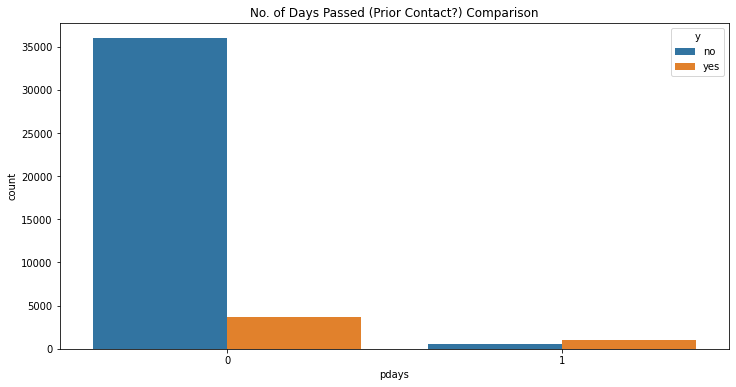

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["pdays"],hue=df_bank["y"], data=df_bank)
plt.title('No. of Days Passed (Prior Contact?) Comparison')
plt.show()

In [ ]:
pdays = (pd.crosstab(index=df_bank["pdays"], columns= df_bank["y"], normalize= "index") *100).round(2)
pdays.sort_values(by='pdays', ascending=False)

y,no,yes
pdays,,
1,36.17,63.83
0,90.74,9.26


The table shows that clients who were previously contacted are 7x more likely to make a term deposit, compared to those who have never been contacted. 

### n. previous

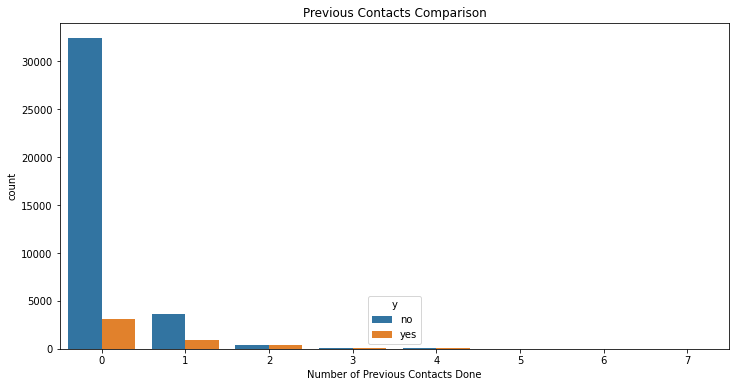

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["previous"],hue=df_bank["y"], data=df_bank)
plt.title('Previous Contacts Comparison')
plt.xlabel('Number of Previous Contacts Done')
plt.show()

In [ ]:
previous = (pd.crosstab(index=df_bank["previous"], columns= df_bank["y"], normalize= "index") *100).round(2)
previous.sort_values('yes', ascending=False)

y,no,yes
previous,,
5,27.78,72.22
6,40.00,60.00
3,40.74,59.26
4,45.71,54.29
2,53.58,46.42
1,78.80,21.20
0,91.17,8.83
7,100.00,0.00


The data portrays that having previous contact with the clients do make an impact in their decision to make a term deposit or not. The table shows that up to 5 contacts with the clients show the most optimum result of ~72% success rate, with the least having less than a 10% rate with 0 or 7 times of contact.

### o. poutcome

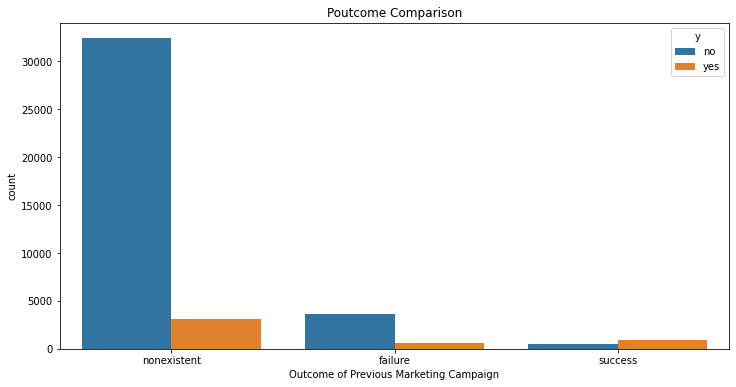

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_bank["poutcome"],hue=df_bank["y"], data=df_bank)
plt.title('Poutcome Comparison')
plt.xlabel('Outcome of Previous Marketing Campaign')
plt.show()

In [ ]:
poutcome = (pd.crosstab(index=df_bank["poutcome"], columns= df_bank["y"], normalize= "index") *100).round(2)
poutcome.sort_values('yes', ascending=False)

y,no,yes
poutcome,,
success,34.89,65.11
failure,85.77,14.23
nonexistent,91.17,8.83


According to the table above, this seems like a good variable to design the audience to target later since it is able to discriminate the dependent target variable.
Clients who were a success in an earlier marketing campaign are almost 5 times more likely to subscribe for a the term deposit, rather than those were a failed case. 

Again, we assume that clients who are 'non-existent' are clients who have yet to receive any prior marketing campaigns from the bank.

### Socio-Economic Attributes' Distribution 


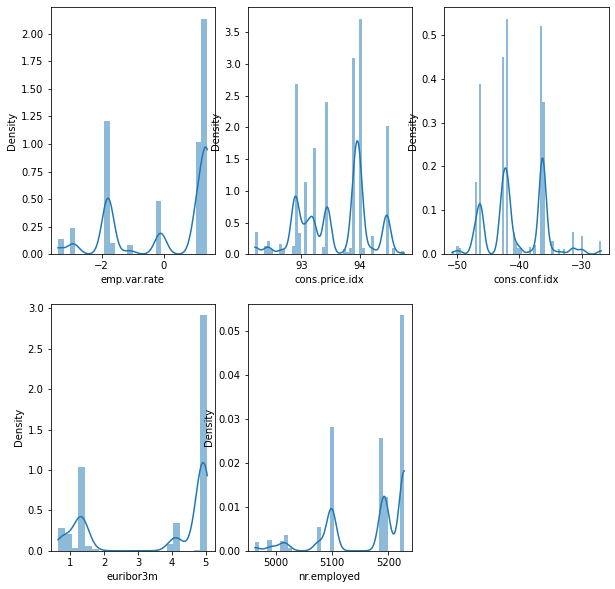

In [ ]:
plt.subplot(231)
sns.histplot(df_bank['emp.var.rate'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.histplot(df_bank['cons.price.idx'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.histplot(df_bank['cons.conf.idx'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.histplot(df_bank['euribor3m'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.histplot(df_bank['nr.employed'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

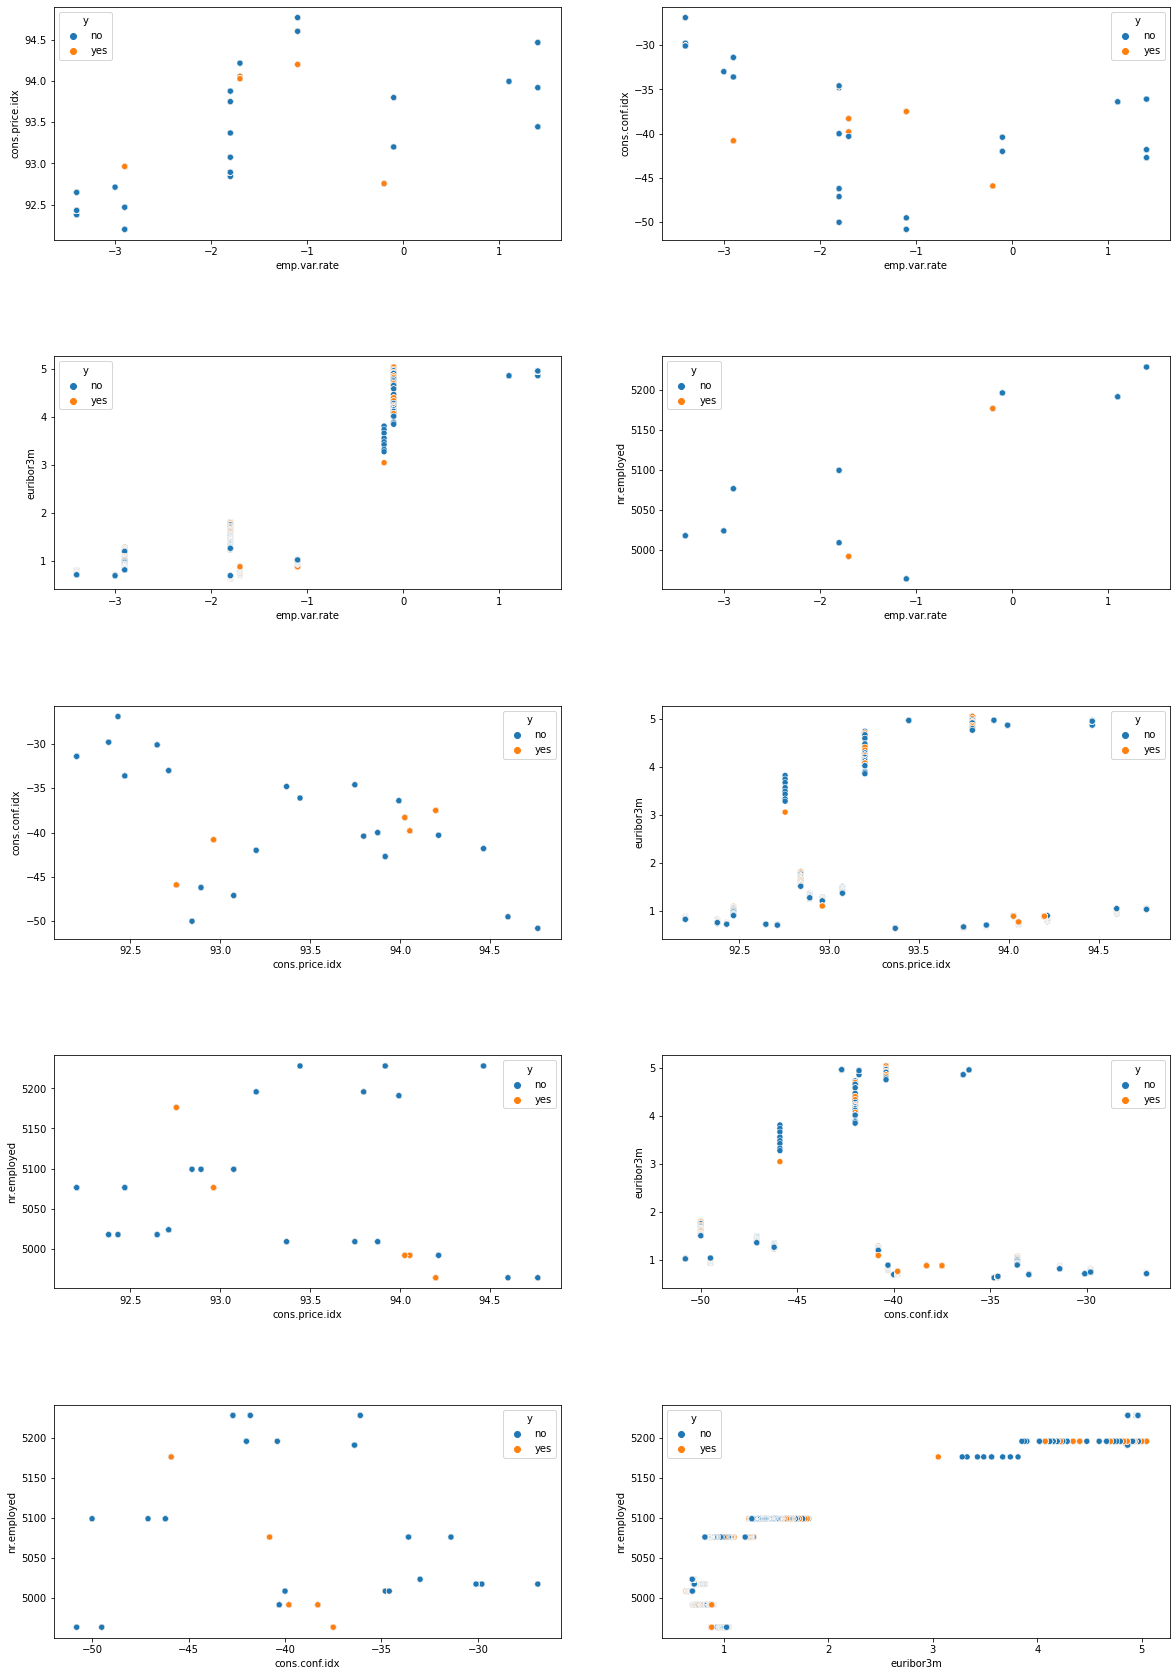

In [ ]:
x=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
y=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(5,2, figsize=(20,30))
ax = ax.ravel()
position=0
for i in range(len(x)):
    for j in range(i+1,len(y)):
        sns.scatterplot(x=x[i], y=y[j], data=df_bank, hue='y',ax=ax[position])
        #sns.scatterplot(x=x[i], y=y[j], data=df_bank[df_bank['y']==1], hue='y',ax=ax[position])
        position=position+1
        
plt.subplots_adjust(hspace=0.5)
plt.show()

Insights from **distribution** plot (no comparisons amongst attributes):

- High employee variation rate seems to signify that the campaign was made when there are high job demand supply due to (possibly good) economical conditions.
- The consumer price index seems relatively high, meaning goods and service prices are relatively good, which is a stimulant for clients to make a deposit by giving the idea of savings.
- Consumer confidence index seems pretty low, perhaps due to fluctuating economy. 
- The 3 months Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In this case the interest rates seem relatively high for lending their loans.
- Number of employees seem pretty high, which can increase their income index that could be the factor the campaign targetted in order to get employed clients to make a term deposit.


Insight(s) from the **scatterplot** graphs (comparison made with attributes):

- Clients seem inclined to make a deposit when 'cons.price.idx' is lower and 'emp.var.rate' is negative. 
- When 'nr.employed' is less than 5100, clients tend to make a term deposit. The remaining relationships do not show any evident trend.



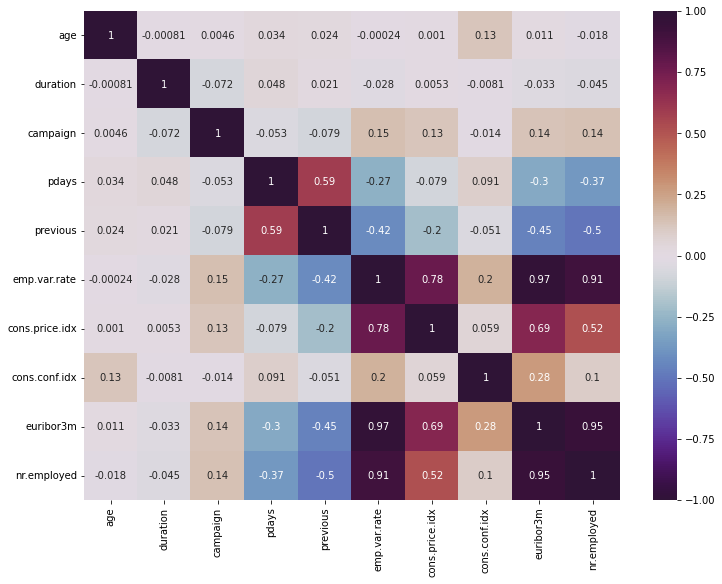

In [ ]:
plt.figure(figsize=(12, 9))
corr = df_bank.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True,cmap= 'twilight_shifted');

From the correlation matrix above:

- The indicators have a correlation amongst themselves.
- The number of employees 'nr.employed', is highly correlated with employee variation rate 'emp.var.rate'.
- Consumer price index is relatively high in correlation with bank interest rate 'euribor3m', wherein the higher the price index, the higher the interest rate.
- Employee variation rate also correlates with the bank interest rates.
- Other variables do not show any higher correlation amongst one another.

However, those variables with high correlation are not necessarily relevant since they are not target variables.

As mentioned in the dataset column explanation, 'duration' column is going to be discarded in this part since most values are '0' and that include unanswered calls. 


# Data Preprocessing

## Feature Selection - With Selected Dropped Columns

In [ ]:
df_temp = df_bank

In [ ]:
df_bank = df_temp

The following columns are not going to be used for further analysis of target variable, hence dropped.

In [ ]:
df_bank = df_bank.drop(columns=['marital'])
df_bank = df_bank.drop(columns=['education'])
df_bank = df_bank.drop(columns=['housing'])
df_bank = df_bank.drop(columns=['duration'])
df_bank = df_bank.drop(columns=['day_of_week'])
df_bank = df_bank.drop(columns=['loan'])
df_bank = df_bank.drop(columns=['age'])

In [ ]:
df_bank_feat = df_bank
df_bank_feat.head()

,job,default,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup
0,housemaid,no,telephone,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
1,services,unknown,telephone,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
2,services,no,telephone,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle-age Adult
3,admin.,no,telephone,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle-age Adult
4,services,no,telephone,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly


In [ ]:
# Numerical encoding for categorical columns

# 'month' column encoding
month_dict={'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df_bank_feat['month']= df_bank_feat['month'].map(month_dict) 

In [ ]:
# binary encode 'y' column to 0 for no and 1 for yes
y_dict={'no': 0,'yes': 1}
df_bank_feat['y']= df_bank_feat['y'].map(y_dict)

In [ ]:
df_bank_feat.head()

,job,default,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup
0,housemaid,no,telephone,5,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly
1,services,unknown,telephone,5,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly
2,services,no,telephone,5,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-age Adult
3,admin.,no,telephone,5,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-age Adult
4,services,no,telephone,5,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly


### Split Train and Test Sets

In [ ]:
X_drop = df_bank_feat.drop('y',axis=1)
y_drop = df_bank_feat['y']

In [ ]:
from sklearn.model_selection import train_test_split
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y_drop, random_state=42, test_size=0.20)

print(X_drop_train.shape, X_drop_test.shape, y_drop_train.shape, y_drop_test.shape)

(32940, 14) (8236, 14) (32940,) (8236,)


### Random OverSampling

We tried to apply RandomOverSampler, an oversampling technique, to alleviate the effects of the imbalance during model training. The following will impute additional data points to improve balance across classes.

In [ ]:
print(f"Before OverSampling, counts of label '1': {sum(y_drop_train == 1)}") 
print(f"Before OverSampling, counts of label '0': {sum(y_drop_train == 0)} \n") 

from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.4) 
X_drop_train_over, y_drop_train_over = oversample.fit_resample(X_drop_train, y_drop_train)
  
print(f'After OverSampling, the shape of X_train: {X_drop_train_over.shape}') 
print(f'After OverSampling, the shape of y_train: {y_drop_train_over.shape} \n') 
  
print(f"After OverSampling, counts of label '1': {sum(y_drop_train_over == 1)}") 
print(f"After OverSampling, counts of label '0': {sum(y_drop_train_over == 0)}") 

Before OverSampling, counts of label '1': 3668
Before OverSampling, counts of label '0': 29272 

After OverSampling, the shape of X_train: (40980, 14)
After OverSampling, the shape of y_train: (40980,) 

After OverSampling, counts of label '1': 11708
After OverSampling, counts of label '0': 29272


## Classification Model

For our classification model(s), we have chosen to use:
- Logistic Regression
- K Neighbours
- Random Forest
- Gradient Boosting (XGBoost)

Logistic Regression is more easily interpretable in terms of feature importance for data analysis. It is relatively easier to show which feature contributes the most to the model. 

Random Forest is used since it shows better accuracy on the model performance. The model performance on prediction is prioritised, however, it is not as easily interpretable due to the complex output nature. It is a black box in terms of interpretable explanation, however, since we want to prioritise model performance, this model is our go-to for this particular case. 

## Pipeline

In [ ]:
# group into numerical, categorical, and binary columns for encoding
num_cols = ['month', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'cons.conf.idx']
ctg_cols = ['default', 'contact', 'poutcome', 'agegroup']
binary_cols = ['job']

In [ ]:
!pip install  category_encoders

     |████████████████████████████████| 82 kB 383 kB/s 


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import category_encoders as ce

scaler = StandardScaler()
onencoder = OneHotEncoder()
binaryencode = ce.BinaryEncoder()

# encode the columns
col_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), num_cols),
    ('onencoder', OneHotEncoder(), ctg_cols),
    ('binaryencode', ce.BinaryEncoder(), binary_cols)
])


# Create pipelines for each model classifiers
# Logistic Regression
pipe_lr = Pipeline([
    ('col_transformer', col_transformer),
    ('log_reg', LogisticRegression(solver='liblinear'))
])

# KNN 
pipe_knn = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', KNeighborsClassifier())
])

# Random Forest
pipe_rf = Pipeline([
    ('col_transformer', col_transformer),
    ('random_f', RandomForestClassifier())
])

# XGBoost Classifier
pipe_xgb = Pipeline([
    ('col_transformer', col_transformer),
    ('xgb', GradientBoostingClassifier())
])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
pipe_lr.fit(X_drop_train_over, y_drop_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m', 'nr.employed',
                                                   'cons.conf.idx']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['default', 'contact',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
                                                  BinaryEncoder(), ['job'])])),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [ ]:
pipe_knn.fit(X_drop_train_over, y_drop_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m', 'nr.employed',
                                                   'cons.conf.idx']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['default', 'contact',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
                                                  BinaryEncoder(), ['job'])])),
                ('knn', KNeighborsClassifier())])

In [ ]:
pipe_rf.fit(X_drop_train_over, y_drop_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m', 'nr.employed',
                                                   'cons.conf.idx']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['default', 'contact',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
                                                  BinaryEncoder(), ['job'])])),
                ('random_f', RandomForestClassifier())])

In [ ]:
pipe_xgb.fit(X_drop_train_over, y_drop_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m', 'nr.employed',
                                                   'cons.conf.idx']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['default', 'contact',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
                                                  BinaryEncoder(), ['job'])])),
                ('xgb', GradientBoostingClassifier())])

### Cross Validation

Following the pipeline construction, we used cross validation to find out which algorithm will be the best for our prediction model by checking the model accuracy at once. 
Then, we will proceed with the model that exhibits the highest accuracy amongst the rest.

In [ ]:
from sklearn.model_selection import cross_validate

models = [pipe_lr, pipe_knn, pipe_rf, pipe_xgb]

# prepare CV result summary table
df_results = pd.DataFrame()

for pipeline_ in models:
    current_step_name = list(pipeline_.named_steps.keys())[1]
    cv_scores = cross_validate(pipeline_, X_drop_train_over, y_drop_train_over, cv=15, scoring=('accuracy',
                                                                           'precision',
                                                                           'recall', 'f1'), 
                               return_train_score=True)
    df_results = df_results.append({
        'algorithm': pipeline_.named_steps[current_step_name].__class__.__name__,
        'Accuracy (train)': cv_scores['train_accuracy'].mean(),
        'Accuracy (val)': cv_scores['test_accuracy'].mean(),
        'Precision (train)': cv_scores['train_precision'].mean(),
        'Precision (val)': cv_scores['test_precision'].mean(),
        'Recall (train)': cv_scores['train_recall'].mean(),
        'Recall (val)': cv_scores['test_recall'].mean(),
        'F1 (train)': cv_scores['train_f1'].mean(),
        'F1 (val)': cv_scores['test_f1'].mean(),
    }, ignore_index=True)
    
df_results

,Accuracy (train),Accuracy (val),F1 (train),F1 (val),Precision (train),Precision (val),Recall (train),Recall (val),algorithm
0,0.797990,0.797950,0.558743,0.558977,0.743143,0.742661,0.447667,0.448324,LogisticRegression
1,0.869314,0.821157,0.776988,0.695290,0.758145,0.676585,0.796824,0.715644,KNeighborsClassifier
2,0.925812,0.879209,0.865844,0.789071,0.895656,0.786622,0.837956,0.792008,RandomForestClassifier
3,0.816492,0.815154,0.627347,0.624532,0.747159,0.744136,0.540656,0.538175,GradientBoostingClassifier


In [ ]:
best_model_drop = df_results.loc[[2]]
best_model_drop['algorithm']= "RandomForestClassifier_drop"
best_model_drop

,Accuracy (train),Accuracy (val),F1 (train),F1 (val),Precision (train),Precision (val),Recall (train),Recall (val),algorithm
2,0.925812,0.879209,0.865844,0.789071,0.895656,0.786622,0.837956,0.792008,RandomForestClassifier_drop


## Feature Engineering - Without Dropped Columns

In [ ]:
df_bank=df_temp

In [ ]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle-age Adult
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle-age Adult
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Elderly
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Old-age Adult
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Elderly
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Old-age Adult


In [ ]:
# 'duration' column is dropped to achieve a more realistic model
# 'age' column is also dropped since a new column 'agegroup' is made
df_bank_feat = df_bank.drop(columns=['duration'])
df_bank_feat = df_bank_feat.drop(columns=['age'])

In [ ]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df_bank_feat['month']= df_bank_feat['month'].map(month_dict) 

In [ ]:
# binary encode 'y' column to 0 for no and 1 for yes
y_dict={'no': 0,'yes': 1}
df_bank_feat['y']= df_bank_feat['y'].map(y_dict)

### Split Train and Test Sets

In [ ]:
X = df_bank_feat.drop('y',axis=1)
y = df_bank_feat['y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32940, 19) (8236, 19) (32940,) (8236,)


### Random OverSampling

In [ ]:
print(f"Before OverSampling, counts of label '1': {sum(y_train == 1)}") 
print(f"Before OverSampling, counts of label '0': {sum(y_train == 0)} \n") 

from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.4) 
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of X_train: {}'.format(X_train_over.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_over.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0))) 

Before OverSampling, counts of label '1': 3668
Before OverSampling, counts of label '0': 29272 

After OverSampling, the shape of X_train: (40980, 19)
After OverSampling, the shape of y_train: (40980,) 

After OverSampling, counts of label '1': 11708
After OverSampling, counts of label '0': 29272


## Pipeline

In [ ]:
df_bank_feat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'agegroup'],
      dtype='object')

In [ ]:
# group into numerical, categorical, and binary columns for encoding
num_cols = ['month', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']
ctg_cols = ['marital','education','housing', 'loan', 'default', 'contact','day_of_week', 'poutcome', 'agegroup']
binary_cols = ['job']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import category_encoders as ce

scaler = StandardScaler()
onencoder = OneHotEncoder()
binaryencode = ce.BinaryEncoder()

# encode the columns
col_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), num_cols),
    ('onencoder', OneHotEncoder(), ctg_cols),
    ('binaryencode', ce.BinaryEncoder(), binary_cols)
])


# Create pipelines for each model classifiers
# Logistic Regression
pipe_lr = Pipeline([
    ('col_transformer', col_transformer),
    ('log_reg', LogisticRegression(solver='liblinear'))
])

# KNN 
pipe_knn = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', KNeighborsClassifier())
])

# Random Forest
pipe_rf = Pipeline([
    ('col_transformer', col_transformer),
    ('random_f', RandomForestClassifier())
])

# XGBoost Classifier
pipe_xgb = Pipeline([
    ('col_transformer', col_transformer),
    ('xgb', GradientBoostingClassifier())
])

In [ ]:
# Fit oversampled training sets into each model's pipeline
pipe_lr.fit(X_train_over, y_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx',
                                                   'cons.price.idx',
                                                   'euribor3m',
                                                   'nr.employed']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['marital', 'education',
                                                   'housing', 'loan', 'default',
                                                   'contact', 'day_of_week',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
 

In [ ]:
pipe_knn.fit(X_train_over, y_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx',
                                                   'cons.price.idx',
                                                   'euribor3m',
                                                   'nr.employed']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['marital', 'education',
                                                   'housing', 'loan', 'default',
                                                   'contact', 'day_of_week',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
 

In [ ]:
pipe_rf.fit(X_train_over, y_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx',
                                                   'cons.price.idx',
                                                   'euribor3m',
                                                   'nr.employed']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['marital', 'education',
                                                   'housing', 'loan', 'default',
                                                   'contact', 'day_of_week',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
 

In [ ]:
pipe_xgb.fit(X_train_over, y_train_over)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['month', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx',
                                                   'cons.price.idx',
                                                   'euribor3m',
                                                   'nr.employed']),
                                                 ('onencoder', OneHotEncoder(),
                                                  ['marital', 'education',
                                                   'housing', 'loan', 'default',
                                                   'contact', 'day_of_week',
                                                   'poutcome', 'agegroup']),
                                                 ('binaryencode',
 

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

models = [pipe_lr, pipe_knn, pipe_rf, pipe_xgb]

# prepare CV result summary table
df_results_second = pd.DataFrame()

for pipeline_ in models:
    current_step_name = list(pipeline_.named_steps.keys())[1]
    cv_scores = cross_validate(pipeline_, X_train_over, y_train_over,
                               cv=15, scoring=('accuracy', 'precision','recall', 'f1'), 
                               return_train_score=True)
    df_results_second = df_results_second.append({
        'algorithm': pipeline_.named_steps[current_step_name].__class__.__name__,
        'Accuracy (train)': cv_scores['train_accuracy'].mean(),
        'Accuracy (val)': cv_scores['test_accuracy'].mean(),
        'Precision (train)': cv_scores['train_precision'].mean(),
        'Precision (val)': cv_scores['test_precision'].mean(),
        'Recall (train)': cv_scores['train_recall'].mean(),
        'Recall (val)': cv_scores['test_recall'].mean(),
        'F1 (train)': cv_scores['train_f1'].mean(),
        'F1 (val)': cv_scores['test_f1'].mean(),
    }, ignore_index=True)
    
df_results_second

,Accuracy (train),Accuracy (val),F1 (train),F1 (val),Precision (train),Precision (val),Recall (train),Recall (val),algorithm
0,0.800167,0.799561,0.568095,0.566880,0.742593,0.740782,0.460003,0.459260,LogisticRegression
1,0.891895,0.824622,0.825567,0.715096,0.765817,0.666257,0.895438,0.772188,KNeighborsClassifier
2,0.984986,0.939507,0.974059,0.899427,0.961781,0.854782,0.986657,0.949591,RandomForestClassifier
3,0.815949,0.813543,0.626163,0.621024,0.745961,0.740438,0.539527,0.534934,GradientBoostingClassifier


In [ ]:
best_model_nodrop = df_results_second.loc[[2]]
best_model_nodrop['algorithm']= "RandomForestClassifier_nodrop"
best_model_nodrop

,Accuracy (train),Accuracy (val),F1 (train),F1 (val),Precision (train),Precision (val),Recall (train),Recall (val),algorithm
2,0.984986,0.939507,0.974059,0.899427,0.961781,0.854782,0.986657,0.949591,RandomForestClassifier_nodrop


The end result shows that Random Forest has the highest accuracy and recall values for our prediction model, followed by the KNeighbors model. We will proceed and take the best model out of the three, Random Forest, to tune and maximize recall and AUC scores, considering our aim to minimize cost with this model. 

## Final Model Selection

In [ ]:
best_model = pd.concat([best_model_drop,best_model_nodrop])
best_model

,Accuracy (train),Accuracy (val),F1 (train),F1 (val),Precision (train),Precision (val),Recall (train),Recall (val),algorithm
2,0.925812,0.879209,0.865844,0.789071,0.895656,0.786622,0.837956,0.792008,RandomForestClassifier_drop
2,0.984986,0.939507,0.974059,0.899427,0.961781,0.854782,0.986657,0.949591,RandomForestClassifier_nodrop


We compiled the two results from the best model, Random Forest, that was run on different terms - with selected dropped columns vs feature engineering with no dropped columns, into a table. 

From the table, scores from feature engineering with no dropped columns are relatively higher. Hence, we decided to proceed tuning just the Random Forest model with no dropped features. 

## Hyperparameter Tuning for Random Forest Model

In [ ]:
# See parameters used for initial pipeline without tuning 
pipe_rf.get_params()

{'col_transformer': ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                  ['month', 'campaign', 'pdays', 'previous',
                                   'emp.var.rate', 'cons.conf.idx',
                                   'cons.price.idx', 'euribor3m',
                                   'nr.employed']),
                                 ('onencoder', OneHotEncoder(),
                                  ['marital', 'education', 'housing', 'loan',
                                   'default', 'contact', 'day_of_week',
                                   'poutcome', 'agegroup']),
                                 ('binaryencode', BinaryEncoder(), ['job'])]),
 'col_transformer__binaryencode': BinaryEncoder(),
 'col_transformer__binaryencode__cols': None,
 'col_transformer__binaryencode__drop_invariant': False,
 'col_transformer__binaryencode__handle_missing': 'value',
 'col_transformer__binaryencode__handle_unknown': 'value',
 'col_transformer__binaryencod

We decided to use RandomizedSearchCV in order to decrease the execution time needed to compile and find the optimized parameters for our model. The chances to find an optimized parameter for the model is also comparatively higher using randomized search as it tests all patterns randomly under the assumption that not all hyperparameters are equally important. Furthermore, it reduces the chance for overfitting to occur, despite potentially high variance due to being random. 

In [ ]:
# Tuning parameter for RF ( tuning parameters are choosen based on best parameters of RandomizedSearchCV)

from sklearn.model_selection import RandomizedSearchCV, cross_val_score

weights = np.arange(0.1,0.9,0.1)
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
pm_rf = {
    'random_f__n_estimators': n_estimators,
    'random_f__max_depth': max_depth,
    'random_f__max_features': max_features,
    'random_f__min_samples_split' : min_samples_split,
#     'random_f__min_samples_leaf': np.arange(1,200,1),
    'random_f__class_weight': [{0:x, 1:1.0-x} for x in weights],
#     "random_f__random_state" : [42],
}
                    
tuning_rf = RandomizedSearchCV(pipe_rf, pm_rf, n_iter=10, cv=15, 
                               verbose = 2, n_jobs=-1, scoring='recall', 
                               random_state= 42)

tuning_rf.fit(X_train_over, y_train_over)
print('Best Parameter for Random Forest', tuning_rf.best_params_)
print(tuning_rf.best_score_)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best Parameter for Random Forest {'random_f__n_estimators': 505, 'random_f__min_samples_split': 5, 'random_f__max_features': 'sqrt', 'random_f__max_depth': 45, 'random_f__class_weight': {0: 0.30000000000000004, 1: 0.7}}
0.9331898617814112


# Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7265
           1       0.40      0.62      0.48       971

    accuracy                           0.85      8236
   macro avg       0.67      0.75      0.70      8236
weighted avg       0.88      0.85      0.86      8236



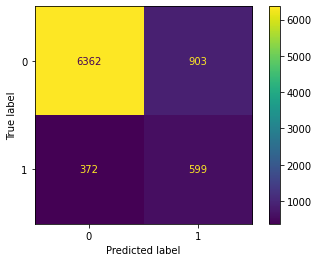

In [ ]:
# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score, precision_recall_curve 
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc, plot_confusion_matrix

# Tuned random forest pipeline

pipe_rf_tuned = Pipeline([
    ('col_transformer', col_transformer),
    ('random_f', RandomForestClassifier(n_estimators = 505, min_samples_split = 5, 
                                        min_samples_leaf = 87, max_features ='sqrt', 
                                        max_depth= 45, class_weight={0:0.30000000000000004, 1: 0.7}))
])

pipe_rf_tuned.fit(X_train_over, y_train_over)
random_pred = pipe_rf_tuned.predict(X_test)

plot_confusion_matrix(pipe_rf_tuned, X_test, y_test)
# confusion_matrix = confusion_matrix(y_test, random_pred)
# print("Confusion Matrix:\n",confusion_matrix)
print(classification_report(y_test, random_pred))

To better understand the matrix above, we performed some simple calculations to evaluate the model's performance on predicting potential clients. 

Assuming that the cost to perform a marketing campaign to a client is \$1 . Therefore, the total cost for telemarketing based on the plot above is \$8,236. Out of 8236 clients, 971 responded 'yes'. The profit made from 1 successful campaign is \$10. Hence, the total profit obtained will be \$9,710 and the total revenue made in the end will be \$1,474. This figure is without the use of the prediction model. 

However, using the model, we are able to reach out to 371 clients whom we initially thought will not be interested in the campaign but are actually potential customers (false negative). That will be an additional \$3,710 in profit, and cutting the cost of \$371, we will get a revenue of about ~\$3,300. This is double the amount of revenue obtained without the use of the model.

Furthermore, we can prevent a loss in telemarketing costs. The plot shows a false positive prediction of 891 and true negative for 600 people. These are clients who were falsely presumed as potential customers and those who are predicted to wholly reject the offer. Knowing this, we can prevent a loss of \$1,491, which further minimise the bank's telemarketing costs.

### ROC - AUC Score

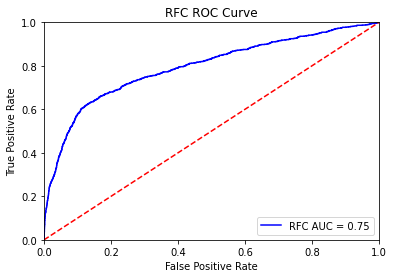

In [ ]:
rfc_roc_auc = roc_auc_score(y_test, pipe_rf_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, pipe_rf_tuned.predict_proba(X_test)[:, 1])

plt.figure()

plt.plot(fpr, tpr, 'b', label = 'RFC AUC = %0.2f' % rfc_roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('RFC ROC Curve')
plt.show()

Of all the model classifiers we have tried, Random Forest model has the highest accuracy of about ~98% using the oversampling technique (minimising the impacts of imbalance through imputation). The initial recall values shown in the cross validation also show a relatively high score of ~95%. Hence, we proceed with further analysis using this as the potentially best model for prediction. 

After tuning, we evaluate the precision, recall, accuracy and f1-score by plotting the confusion matrix. However, the scores are relatively lower than those in cross validation stage. Precision and f1-score for is about 40% and 49%, while recall is ~62%. Meaning that our model, with an accuracy of 85%, is only able to correctly identify about 62% of the times clients who will accept the marketing campaign should the employee reached out to them. It's kept in mind, however, we prioritised recall values in order to effectively minimize the marketing cost of the campaign. 

We also plotted the ROC curve to check the model's AUC scores. The result is 0.75, which means that there is a 75% chance that the model will be able to distinguish between positive class and negative class. This shows that the model is moderately good in distinguishing potential target clients for the bank. 

Furthermore, though Random Forest is not the easiest model to interpret, we'd like assess which features are most useful in identifying whether a client will make a term deposit to the bank or not.

# Feature Importance


In [ ]:
bank_columns =[]
bank_columns.append(num_cols+list(pipe_rf.named_steps['col_transformer'].transformers_[1][1].get_feature_names(ctg_cols))+pipe_rf.named_steps['col_transformer'].transformers_[2][1].get_feature_names())
bank_columns[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['month',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'cons.price.idx',
 'euribor3m',
 'nr.employed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'default_no',
 'default_unknown',
 'default_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'agegroup_Elderly',
 'agegroup_Middle-age Adult',
 'agegroup_Old-age Adult',
 'agegroup_Young',
 'job_0',
 'job_1',
 'job_2',
 'job_3']

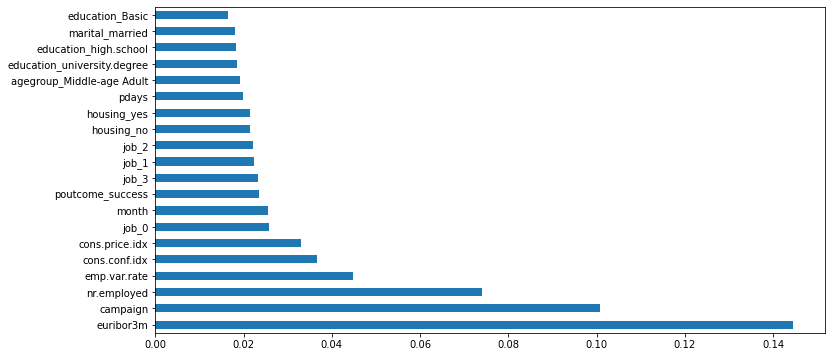

In [ ]:
plt.figure(figsize=(12, 6))
feat_importances = pd.Series(pipe_rf.steps[1][1].feature_importances_, index=bank_columns[0])
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

As we can see from the graph above, the top 20 features that contributed to the best recall score are listed. The feature that has the most influence is euribor3m, followed by campaign and number of employees. Most of these are however, socio-economic attributes.

In terms of provided bank client data, 'pdays', 'poutcome' and 'job' seem to be the next features that make considerable impact to the model's prediction as well. 

# Conclusion and Recommendation

Random Forest is a relatively good prediction model for this case. As we focused on model performance to minimize marketing cost of the bank, this model can be utilised to help the bank's call center to prioritise the call for potential clients and maximise the conversion rate - all while managing minimum cost on marketing. 

For instance, with regards to the model's evaluation plotted out in the confusion matrix, we can see that the maximum revenue the bank will achieve without using the model is \$1,474. However, if the model is used, there is a chance for acquiring clients who are initially assumed as uninterested clients to be potential customers. This can bring about an additional revenue of approximately ~\$3,300 and maintains the quality of the conversion rate. The bank can also avoid spending an additional marketing cost of \$1,491 for clients who may appear interested but are not actually willing to make a deposit. Therefore, implementing the model can give about 2x more revenue to the bank.

Neverthelsess, we believe that there are still further improvements which can be made to the model, such as addressing the low precision/f1-scores. We also expect that implementing some more advanced techniques such as dimensionality reduction, ensemble learning and deep learning may contribute to the model's performance. Finally, we presume that by leveling the imbalanced data (e.g. there were less data on clients who agreed to make a term deposit), we can improve its overall performance further.


Below are also recommendations derived from EDA and model analysis that can be used for improving a similar marketing campaign, launching new campaigns, and addressing the bank's marketing strategy.

Recommendations for the Sales Department (Call Center):

- Since job types seem to make a considerable impact, the bank can try to classify job roles based on corporate tiers and approach all tier 1 employees within a few days after the campaign commences. The bank can also try to make the 'job' specification column a mandatory criteria for the client to fill in when they make an account. 
- Though not recommended to use in model analysis, in EDA, increase in call durations seem to have higher conversion rate. Hence, it may be good to listen to the clients and extract more information to deliver the best deposit plan.
- Design/tune the campaign according to the national econometrics, don't chanelize the expenses on campaign when the national economy is performing poor.
- Always contact clients by cellphone when possible.
- Plan most calls to clients on Thursday, Tuesday, Wednesday where conversion rates seem to be at its highest.
- Bank can possibly create a loyalty programme for existing clients by giving them some bonuses and unique offers. The data shows that loyal clients, or clients with frequent past contacts are most likely buy more products/higher conversion rate for making a term deposit. 